# Recurrent Neural Networks  (RNN)
## 1. Introduction
前馈神经网络中，信息只有单向传播，这一定程度上使得模型容易学习，但同时也削弱了模型的能力。前馈神经网络可以看作一个复杂的函数，每次输入独立，输出只依赖于当前的输入。但实际任务中，网络输出不仅与当前输入相关，还与之前的输出相关。例如，自然语言处理中，一句话的意思不仅仅取决于当前的词，还取决于之前的词。为了解决这个问题，RNN应运而生。RNN是一类有短期记忆能力的神经网络，常用于处理序列数据，使得它们特别适合处理语言处理、时间序列分析、生物信息学等领域的任务。

#### 核心概念

- **循环结构**：RNN的核心特点是网络中存在循环，这意味着网络的输出可以再次作为输入。这种结构使得RNN能够保留过去信息的记忆，并将其用于当前的计算中。
- **隐藏状态**：RNN通过隐藏状态（hidden state）来存储过去信息的摘要。隐藏状态在序列的每个时间步上都会更新，以包含到当前步骤为止的信息。
- **参数共享**：在处理序列的每个元素时，RNN在其所有时间步上共享参数。这种参数共享机制使得RNN能够处理变长的输入序列。

#### 基本结构

一个基本的RNN单元包含一个简单的神经网络层，该层不仅接收当前时间步的输入，还接收上一个时间步的隐藏状态作为输入。输出包括当前时间步的隐藏状态（可以传递到下一个时间步）和实际的输出（可选）。

<img src="./images/img_7.png">

#### 数学表示

假设在时间步$\( t \)$的输入是$\( x_t \)$，上一个时间步的隐藏状态是$\( h_{t-1} \)$，那么RNN单元可以表示为：

- 更新隐藏状态：$$\[ h_t = f(W_{hh}h_{t-1} + W_{xh}x_t + b_h) \]$$
- 生成输出（可选）：$$\[ y_t = g(W_{hy}h_t + b_y) \]$$

其中，$\( W_{hh} \)$、$\( W_{xh} \)$和$\( W_{hy} \)$是权重矩阵，$\( b_h \)$和$\( b_y \)$是偏置项，$\( f \)$和$\( g \)$是激活函数，通常$\( f \)$是非线性激活函数如$tanh$或$ReLU$，$\( g \)$可以是softmax函数（用于分类任务）。

#### 挑战

- **梯度消失和梯度爆炸**：由于RNN的循环结构，它在训练过程中很容易遇到梯度消失和梯度爆炸问题，这使得模型难以学习长距离依赖。
- **长期依赖问题**：标准RNN在处理长序列时效果不佳，因为随着时间的推移，信息会逐渐丢失。

#### 变体

为了解决标准RNN的一些问题，研究者们提出了一些变体，如长短期记忆网络（LSTM）和门控循环单元（GRU）。这些变体通过引入门机制来控制信息的流动，从而更有效地捕捉长期依赖关系。


## 2. 应用模式
循环神经网络（RNN）可以有多种不同的模式，这些模式决定了网络如何处理输入序列和产生输出序列。这些模式包括：

#### 1. 序列到序列（One-to-Many）
- **场景**：当需要从单个输入生成一系列数据时使用，例如音乐生成或图像描述。
- **结构**：一个输入对应多个输出。

#### 2. 序列到单个输出（Many-to-One）
- **场景**：适用于序列分类任务，如情感分析或者主题识别，整个输入序列对应一个单独的输出。
- **结构**：多个输入对应一个输出。

<img src="./images/img_9.png">

#### 3. 序列到序列（Many-to-Many，同步）
- **场景**：当输入和输出都是序列，并且对于每个输入时间步都有一个对应的输出时使用，如机器翻译（输入和输出序列长度相同）。
- **结构**：每个输入对应一个输出，序列长度保持不变。
<img src="./images/img_10.png">

#### 4. 序列到序列（Many-to-Many，异步）
- **场景**：输入和输出都是序列，但输出序列的长度可以不同，如语音识别或者机器翻译（输入和输出序列长度不同）。
- **结构**：多个输入对应多个输出，序列长度可以变化。
<img src="./images/img_11.png">

#### 5. 双向RNN（Bidirectional RNN）
- **场景**：当需要考虑输入序列的前后文时使用，比如在文本处理中更好地理解上下文。
- **结构**：RNN在两个方向上运行，正向和反向，每个时间步的输出是两个方向隐藏状态的函数。

#### 6. 深层RNN（Deep RNN）
- **场景**：为了增加模型的复杂性和学习能力，可以堆叠多个RNN层。
- **结构**：每个时间步的输出除了传递给下一个时间步，也传递给下一个RNN层。

这些模式可以根据具体任务的需求进行组合和匹配，以达到更好的性能。例如，双向和深层RNN可以结合起来处理复杂的序列到序列任务。选择哪种模式取决于输入数据的性质和想要的输出类型。

## 3. 参数学习
同样可以使用梯度下降等方法（optimizer）来学习参数，但是由于RNN中存在递归调用的函数，其参数的梯度计算方法与前馈神经网络有所不同。RNN中的梯度计算方法主要有以下几种：

#### 1. 时间反向传播（Backpropagation Through Time，BPTT）
循环神经网络（RNN）的梯度计算通常使用反向传播（Backpropagation Through Time, BPTT）算法。反向传播是一种用于计算神经网络中参数的梯度的常用方法，而BPTT是针对具有时间步骤的循环结构的特殊情况。

以下是RNN的梯度计算步骤：

1. 前向传播：首先，通过输入数据和前一时间步骤的隐藏状态进行前向传播，计算当前时间步骤的隐藏状态和输出。

2. 计算损失：使用前向传播得到的输出计算损失函数（通常是根据任务选择的，如均方误差或交叉熵）来衡量模型的性能。

3. 反向传播：从时间步骤T（最后一个时间步骤）开始，计算梯度。

4. 通过时间步骤反向传播：然后，通过时间步骤t从T到1依次反向传播梯度，更新权重和偏差。每个时间步骤的梯度计算包括以下步骤：
   a. 计算隐藏状态梯度：
   b. 计算权重和偏差的梯度：

5. 参数更新：使用计算得到的梯度，通过梯度下降或其他优化算法更新权重矩阵和偏差向量。

这些步骤组成了BPTT算法，用于计算RNN模型的梯度，以便在训练过程中更新参数以最小化损失函数。这个过程在训练中迭代进行，直到达到收敛或设定的训练迭代次数。

#### 2. 实时递归学习（Real-Time Recurrent Learning，RTRL）
RTRL是一种精确的梯度计算方法，它通过计算每个时间步上的梯度来更新参数。RTRL的计算复杂度随着时间步的增加而增加，因此在实际应用中很少使用。

通常，传统的反向传播算法在实际训练中更为常用，因为它更高效，尤其是对于长序列和大规模数据。

## 4. Long Range Dependency
RNN的一个主要问题是难以捕捉长期依赖关系。当序列长度较长时，RNN的梯度会出现梯度消失或梯度爆炸的问题，导致模型难以学习长期依赖关系。为了解决这个问题，研究者们提出了一些变体，如长短期记忆网络（LSTM）和门控循环单元（GRU）。

## 4.1 LSTM
长短期记忆网络（Long Short-Term Memory，LSTM）是一种特殊的RNN变体，它通过引入门机制来控制信息的流动，从而更有效地捕捉长期依赖关系。LSTM单元包括一个细胞状态和三个门：输入门、遗忘门和输出门。

- **输入门（Input Gate）**：决定是否更新单元状态（cell state）。它使用sigmoid激活函数来处理输入数据和先前时间步骤的隐藏状态，以产生一个在0到1之间的值。
- **遗忘门（Forget Gate）**：决定在当前时间步骤是否保留前一时间步骤的单元状态的信息。它也使用sigmoid激活函数来产生一个在0到1之间的值。
- **输出门（Output Gate）**：决定在当前时间步骤的隐藏状态中传递哪些信息给下一个时间步骤的隐藏状态，并将单元状态的一部分映射到输出。它使用sigmoid激活函数来产生一个在0到1之间的值，同时使用双曲正切激活函数来产生一个在-1到1之间的值。

#### 注意：
一般深度学习网络参数时，初始化参数值都较小，但使用LSTM时，参数初始化值要稍微大一些，因为过小的值使得遗忘门的值较小，意味着前一时刻的信息会损失过多，这样的网络难以捕捉到长距离依赖。

LSTM的结构原理可以简要概括如下：

1. 输入门（Input Gate）：
   - 输入门控制新信息的更新量。首先，一个sigmoid层决定哪些值我们将更新，然后一个tanh层创建一个新的候选值向量，将加入到细胞状态中。
   - 输入门的计算公式为：
     $\[i_t = \sigma(W_{xi}x_t + W_{hi}h_{t-1} + W_{ci}c_{t-1} + b_i)\]$
   其中，$\(i_t\)$是输入门的输出，$\(x_t\)$是当前时间步骤的输入，$\(h_{t-1}\)$是前一时间步骤的隐藏状态，$\(c_{t-1}\)$是前一时间步骤的单元状态，$\(W_{xi}\)$、$\(W_{hi}\)$、$\(W_{ci}\)$和$\(b_i\)$是与输入门相关的权重和偏差。

2. 遗忘门（Forget Gate）：
   - 遗忘门决定了哪些信息应该从细胞状态中被丢弃。它通过观察上一时间步的隐藏状态和当前时间步的输入，用sigmoid函数输出一个在0到1之间的数值给每个在细胞状态中的数字。1表示“完全保留此信息”，而0表示“完全丢弃此信息”
   - 遗忘门的计算公式为：
     $\[f_t = \sigma(W_{xf}x_t + W_{hf}h_{t-1} + W_{cf}c_{t-1} + b_f)\]$
   其中，$\(f_t\)$是遗忘门的输出，$\(x_t\)$是当前时间步骤的输入，$\(h_{t-1}\)$是前一时间步骤的隐藏状态，$\(c_{t-1}\)$是前一时间步骤的单元状态，$\(W_{xf}\)$、$\(W_{hf}\)$、$\(W_{cf}\)$和$\(b_f\)$是与遗忘门相关的权重和偏差。

3. 更新单元状态（Cell State Update）：
   - 细胞状态更新是通过遗忘门决定丢弃的信息和输入门决定的新候选值的结合来进行的。首先，我们根据遗忘门的输出丢弃旧的细胞状态的一部分，然后加上输入门的新候选值，以此来更新细胞状态。
   - 更新单元状态的计算公式为：
     $\[c_t = f_t \cdot c_{t-1} + i_t \cdot \tanh(W_{xc}x_t + W_{hc}h_{t-1} + b_c)\]$
   其中，$\(c_t\)$是当前时间步骤的单元状态，$\(\tanh\)$是双曲正切激活函数，$\(W_{xc}\)$、$\(W_{hc}\)$和$\(b_c\)$是与单元状态更新相关的权重和偏差。

细胞状态（Cell State）：
贯穿整个序列，仅通过线性交互，允许信息几乎不变地流动，只有通过门控制的信息才能改变细胞状态。

4. 输出门（Output Gate）：
   - 输出门决定在当前时间步骤的隐藏状态中传递哪些信息给下一个时间步骤的隐藏状态，并将单元状态的一部分映射到输出。它使用sigmoid激活函数来产生一个在0到1之间的值，同时使用双曲正切激活函数来产生一个在-1到1之间的值。
   - 输出门的计算公式为：
     $\[o_t = \sigma(W_{xo}x_t + W_{ho}h_{t-1} + W_{co}c_t + b_o)\]$
   其中，$\(o_t\)$是输出门的输出，$\(x_t\)$是当前时间步骤的输入，$\(h_{t-1}\)$是前一时间步骤的隐藏状态，$\(c_t\)$是当前时间步骤的单元状态，$\(W_{xo}\)$、$\(W_{ho}\)$、$\(W_{co}\)$和$\(b_o\)$是与输出门相关的权重和偏差。

5. 隐藏状态（Hidden State）：
   - 最后，通过输出门和单元状态来计算当前时间步骤的隐藏状态：
     $\[h_t = o_t \cdot \tanh(c_t)\]$
   其中，$\(h_t\)$是当前时间步骤的隐藏状态，$\(\tanh\)$是双曲正切激活函数，$\(o_t\)$是输出门的输出，$\(c_t\)$是当前时间步骤的单元状态。

LSTM的结构允许它在处理长序列时保留和传递信息，同时有效地防止梯度消失问题。它在自然语言处理、语音识别、时间序列预测等领域取得了显著的成功。


## 4.2 GRU
GRU（Gated Recurrent Unit，门控循环单元）是一种常见的循环神经网络（RNN）架构，由Cho等人在2014年提出。GRU旨在解决标准RNN在处理长序列数据时面临的梯度消失或梯度爆炸问题，同时简化了长短期记忆网络（LSTM）的结构。

### GRU的关键特点：

1. **简化的结构：**
   - 与LSTM相比，GRU有更简单的结构。它合并了LSTM的输入门和遗忘门为一个单一的“更新门”，同时将细胞状态和隐藏状态合并为一个状态，这减少了模型的参数数量，简化了模型的计算。

2. **更新门（Update Gate）：**
   - 更新门用于控制前一隐藏状态应该在多大程度上传递到当前隐藏状态。这类似于LSTM的遗忘门和输入门的组合功能。

3. **重置门（Reset Gate）：**
   - 重置门用于决定在计算当前时刻的候选隐藏状态时，应该忽略多少过去的隐藏状态信息。这可以允许模型在必要时“忘记”旧的信息。

4. **候选隐藏状态：**
   - 通过重置门调制的前一隐藏状态和当前输入共同决定了候选隐藏状态，这个过程类似于LSTM中的细胞状态更新，但是更加简化。

5. **最终隐藏状态：**
   - 最终的隐藏状态是通过更新门来决定的，它是前一隐藏状态和候选隐藏状态的加权平均，更新门决定了保留多少旧状态和引入多少新状态。

### GRU的数学表示：

假设$\( x_t \)$是在时间步$\( t \)$的输入，$\( h_{t-1} \)$是前一时间步的隐藏状态，则GRU的计算可以通过以下公式进行：

- 更新门：$\( z_t = \sigma(W_z x_t + U_z h_{t-1} + b_z) \)$
- 重置门：$\( r_t = \sigma(W_r x_t + U_r h_{t-1} + b_r) \)$
- 候选隐藏状态：$\( \tilde{h}_t = \tanh(W_h x_t + U_h (r_t * h_{t-1}) + b_h) \)$
- 最终隐藏状态：$\( h_t = (1 - z_t) * h_{t-1} + z_t * \tilde{h}_t \)$

其中，$\( W \)$和$\( U \)$表示权重矩阵，$\( b \)$表示偏置，$\( \sigma \)$表示sigmoid激活函数，$\( * \)$表示逐元素乘法。

### 应用：

GRU由于其高效和简化的结构，在许多序列处理任务中都表现出色，如语言建模、文本生成、语音识别和机器翻译等。在PyTorch中，GRU可以通过`torch.nn.GRU`模块方便地实现。

### 代码示例
### Pytorch 循环网络参数
input_size-->循环网络输出形状为hidden_size-->全连接层输出形状为output_size

使用pytorch中的`nn.LSTM`模块可以方便地构建LSTM模型。
- `input_size`：输入特征数
- `hidden_size`：隐藏状态的特征数
- `num_layers`：LSTM的层数
- `output_size`：输出特征数
- `batch_first`：指定输入数据的形状为(batch, seq, feature)

nn.LSTM在初始化时需要定义输入特征数和隐藏状态的特征数，以及LSTM的层数。在前向传播过程中，只需要提供输入数据$x$,初始隐藏状态$h_0$和细胞状态$c_0$
同理，nn.GRU在前向传播过程中，只需要提供输入数据$x$,初始隐藏状态$h_0$


#### RNN (`nn.RNN`)

- **基础结构**：RNN 的每个单元只有一个简单的激活函数，如 Tanh 或 ReLU，用于计算当前时间步的隐藏状态。隐藏状态的计算依赖于当前输入和前一时间步的隐藏状态。
- **问题**：标准 RNNs 容易受到梯度消失和梯度爆炸问题的影响，这使得它们难以学习长期依赖关系。

#### LSTM (`nn.LSTM`)

- **增强结构**：长短期记忆网络（Long Short-Term Memory, LSTM）是 RNN 的一个变体，通过引入三个门（输入门、遗忘门、输出门）和一个额外的细胞状态来解决标准 RNN 的梯度消失问题。这些门控机制允许 LSTM 单元记忆和遗忘信息，使其更擅长处理长期依赖。
- **应用**：LSTM 被广泛用于需要长期依赖信息的场景，如语言建模、机器翻译等。

#### GRU (`nn.GRU`)

- **简化版本的 LSTM**：门控循环单元（Gated Recurrent Unit, GRU）是 LSTM 的一个变体，它将 LSTM 中的遗忘门和输入门合并为一个更新门，并将细胞状态和隐藏状态合并。这样简化了模型的结构，减少了参数数量，同时保留了处理长期依赖的能力。
- **优点**：GRU 通常比 LSTM 更简单，训练更快，同时在很多任务中能够达到与 LSTM 相似的性能。

### 总结

- **RNN (`nn.RNN`)**：最基本的循环神经网络结构，适合处理简短序列数据，但难以捕获长期依赖关系。
- **LSTM (`nn.LSTM`)**：引入了门控机制和细胞状态的 RNN，能够有效地捕获长期依赖关系，适用于复杂序列数据处理。
- **GRU (`nn.GRU`)**：LSTM 的简化版本，通过减少门控数量和合并状态来简化模型，保持了处理长期依赖的能力，同时提高了计算效率。

选择哪种类型的 RNN 取决于特定任务的需求、数据的特点以及对模型复杂度和计算效率的考虑。在实践中，通常会对几种模型进行实验，以找到最适合特定任务的模型。

PyTorch的`nn.LSTM`模块提供了标准的LSTM实现，但是对于LSTM的一些变体，可能需要额外的步骤或不同的模块来实现。下面是一些常见的LSTM变体及其在PyTorch中的实现方法：

1. **双向LSTM（BiLSTM）：**
   - 双向LSTM可以通过设置`nn.LSTM`中的`bidirectional=True`参数来实现。双向LSTM在序列的两个方向上进行学习，可以捕获过去和未来的上下文信息。

2. **堆叠LSTM（Stacked LSTM）：**
   - 堆叠LSTM是通过多个LSTM层的堆叠来增加网络的深度，可以通过设置`nn.LSTM`中的`num_layers`参数为大于1的值来实现。

3. **LSTM with Peephole Connections：**
   - 带有窥视孔连接的LSTM在PyTorch的标准`nn.LSTM`模块中没有直接支持。要实现这种变体，可能需要自定义LSTM层，以在门控计算中包含细胞状态的信息。

4. **GRU（门控循环单元）：**
   - 虽然GRU不是LSTM的变体，但它是另一种常见的循环网络类型，有时被视为LSTM的简化版本。PyTorch通过`nn.GRU`模块直接支持GRU。

5. **ConvLSTM：**
   - ConvLSTM将卷积层集成到LSTM单元中，特别适用于视频和图像分析。在PyTorch中，没有直接的`nn.ConvLSTM`模块，但可以通过结合`nn.Conv2d`和自定义LSTM单元来实现。

6. **其他变体：**
   - 对于其他特定的LSTM变体（如Layer Norm LSTM, Coupled Input Forget Gate LSTM等），可能需要通过继承`nn.Module`并自定义LSTM的内部结构来实现。

对于大多数LSTM变体，实现它们通常涉及到修改或扩展标准LSTM的某些方面。虽然PyTorch提供了灵活的模块和工具来帮助构建这些变体，但对于一些特定的变体，可能需要深入了解其内部工作原理并手动实现相关逻辑。

#### LSTM循环单元
在使用PyTorch的`nn.LSTM`模块时，循环的过程是内置的，意味着您不需要手动编写处理序列每个时间步的循环。`nn.LSTM`会自动处理整个序列的所有时间步。这是通过高效的底层实现完成的，通常在C或CUDA级别，以便在GPU上实现优化。

循环的次数取决于输入序列的长度。对于给定的输入张量，如果其形状为`(batch_size, seq_len, input_size)`（当`batch_first=True`时），`nn.LSTM`会在内部循环`seq_len`次，即序列的长度。每次循环都会处理序列中的一个时间步，更新隐藏状态和细胞状态。

在您提供的示例代码中，序列长度（`sequence_length`）被设置为5，因此对于每个输入序列，`nn.LSTM`将循环5次，每次处理序列中的一个时间步。这个循环过程对于每个批次中的所有序列都是相同的，但由于`nn.LSTM`的并行处理能力，所有序列的所有时间步通常是同时处理的，而不是逐个序列或逐个时间步进行。

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data import random_split

# 定义LSTM模型
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # LSTM循环单元
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True) # batch_first=True指定输入数据的形状为(batch, seq, feature)
        # 全连接层
        self.fc = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        # 初始化隐藏状态h0和细胞状态c0
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # 前向传播，将数据x和初始隐藏状态h0、细胞状态c0传入LSTM
        # lstm的输出包含 output（每个时间步的隐藏状态）和 (h_n, c_n)（最后一个时间步的隐藏状态和细胞状态）
        # 每个时间步的隐藏状态可以用于序列标注任务（如命名实体识别），
        # 而最后一个时间步的隐藏状态和细胞状态常用于初始化后续处理步骤的状态，或作为序列分类任务的特征。
        out, [h_n, c_n] = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :]) # 取最后一个时间步的隐藏状态作为模型的输出,等同于h_n。但是一般情况下，h_n和c_n会作为后续处理步骤的状态。
        out = self.sigmoid(out) # 输出通过sigmoid激活函数,转换到0-1之间用于二分类
        return out

In [4]:
# GRU模型定义
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRUModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # GRU层
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        
        # 全连接层
        self.fc = nn.Linear(hidden_size, output_size)
        
        # Sigmoid激活函数
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # GRU模型只需要初始化隐藏状态h0，不需要初始化细胞状态c0
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])  # 取最后一个时间步的隐藏状态作为模型的输出
        
        out = self.sigmoid(out)  # 将输出转换为概率值
        return out

### Data Preparation
- total_samples = 100000：总样本数
- batch_size = 32：每个批次的样本数（从100000个样本中抽取32个样本），最后剩余的样本数不足32个时，最后一个批次的样本数会小于32
- sequence_length = 5：序列长度，即时间步数。比如连续5天的气温数据
- input_size = 10：输入特征数，比如每天的气温、湿度、风速等共10个特征
- output_size = 1：输出特征数

In [6]:
# 准备示例数据
batch_size = 32
sequence_length = 5
input_size = 10
output_size = 1
total_samples = 100000

# 生成随机输入数据和标签
data = torch.randn(total_samples, sequence_length, input_size) # [100000, 5, 10]
labels = torch.randint(0, 2, (total_samples, output_size), dtype=torch.float32) # [100000, 1]
 
# 创建数据集
dataset = TensorDataset(data, labels)

# 划分训练集和验证集
train_size = int(0.8 * total_samples)  # 80%的样本用于训练
test_size = total_samples - train_size  # 剩余部分用于验证

train_dataset, valid_dataset = random_split(dataset, [train_size, test_size])

# 创建数据加载器
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

In [21]:
# 训练模型
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    batch_losses = []
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        outputs = model(data)
        loss = nn.BCELoss()(outputs, target)
        loss.backward()
        optimizer.step()
        
        # 记录当前批次的损失值
        batch_losses.append(loss.item())  # 记录的是损失值，不是RMSE
        
        if batch_idx % 100 == 0:
            print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}")
        
    return batch_losses


def test(model, device, test_loader):
    model.eval()
    batch_losses = []  # 用于保存每个批次的损失
    correct = 0
    total_loss = 0  # 用于计算总损失
    
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            outputs = model(data)
            loss = nn.BCELoss()(outputs, target)
            total_loss += loss.item() * data.size(0)  # 累加批次损失，考虑批次大小
            batch_loss = loss.item()  # 当前批次损失
            batch_losses.append(batch_loss)  # 保存当前批次损失
            predicted = (outputs > 0.5).float()
            correct += (predicted == target).sum().item()
        
    average_loss = total_loss / len(test_loader.dataset)  # 计算平均损失
    accuracy = correct / len(test_loader.dataset)

    print(f"\nTest set: Average loss: {average_loss:.4f}, Accuracy: {accuracy * 100:.2f}%")
    
    return batch_losses

#### 训练和测试LSTM模型

In [11]:
# 设置设备并实例化模型，定义损失函数和优化器，开始训练和测试
device = torch.device("cuda" )
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMModel(input_size, hidden_size=16, num_layers=2, output_size=output_size).to(device)
optimizer = optim.Adam(model.parameters())

train_losses = []
test_losses = []

for epoch in range(1, 3):  # 假设你想训练5个epoch
    train_loss = train(model, device, train_loader, optimizer, epoch)
    test_loss = test(model, device, test_loader)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

Train Epoch: 1 [0/80000 (0%)]	Loss: 0.710546
Train Epoch: 1 [3200/80000 (4%)]	Loss: 0.691804
Train Epoch: 1 [6400/80000 (8%)]	Loss: 0.694678
Train Epoch: 1 [9600/80000 (12%)]	Loss: 0.691445
Train Epoch: 1 [12800/80000 (16%)]	Loss: 0.693703
Train Epoch: 1 [16000/80000 (20%)]	Loss: 0.695096
Train Epoch: 1 [19200/80000 (24%)]	Loss: 0.697176
Train Epoch: 1 [22400/80000 (28%)]	Loss: 0.694983
Train Epoch: 1 [25600/80000 (32%)]	Loss: 0.691807
Train Epoch: 1 [28800/80000 (36%)]	Loss: 0.696377
Train Epoch: 1 [32000/80000 (40%)]	Loss: 0.691913
Train Epoch: 1 [35200/80000 (44%)]	Loss: 0.685603
Train Epoch: 1 [38400/80000 (48%)]	Loss: 0.694799
Train Epoch: 1 [41600/80000 (52%)]	Loss: 0.692193
Train Epoch: 1 [44800/80000 (56%)]	Loss: 0.690727
Train Epoch: 1 [48000/80000 (60%)]	Loss: 0.701143
Train Epoch: 1 [51200/80000 (64%)]	Loss: 0.695948
Train Epoch: 1 [54400/80000 (68%)]	Loss: 0.695317
Train Epoch: 1 [57600/80000 (72%)]	Loss: 0.693655
Train Epoch: 1 [60800/80000 (76%)]	Loss: 0.691530
Train Epoc

#### 可视化训练和测试损失

Train Epoch: 1 [0/80000 (0%)]	Loss: 0.679782
Train Epoch: 1 [3200/80000 (4%)]	Loss: 0.717877
Train Epoch: 1 [6400/80000 (8%)]	Loss: 0.691061
Train Epoch: 1 [9600/80000 (12%)]	Loss: 0.652120
Train Epoch: 1 [12800/80000 (16%)]	Loss: 0.690127
Train Epoch: 1 [16000/80000 (20%)]	Loss: 0.684025
Train Epoch: 1 [19200/80000 (24%)]	Loss: 0.698870
Train Epoch: 1 [22400/80000 (28%)]	Loss: 0.673506
Train Epoch: 1 [25600/80000 (32%)]	Loss: 0.690243
Train Epoch: 1 [28800/80000 (36%)]	Loss: 0.698649
Train Epoch: 1 [32000/80000 (40%)]	Loss: 0.680589
Train Epoch: 1 [35200/80000 (44%)]	Loss: 0.710455
Train Epoch: 1 [38400/80000 (48%)]	Loss: 0.721013
Train Epoch: 1 [41600/80000 (52%)]	Loss: 0.686334
Train Epoch: 1 [44800/80000 (56%)]	Loss: 0.709760
Train Epoch: 1 [48000/80000 (60%)]	Loss: 0.680564
Train Epoch: 1 [51200/80000 (64%)]	Loss: 0.675236
Train Epoch: 1 [54400/80000 (68%)]	Loss: 0.691641
Train Epoch: 1 [57600/80000 (72%)]	Loss: 0.684351
Train Epoch: 1 [60800/80000 (76%)]	Loss: 0.716126
Train Epoc

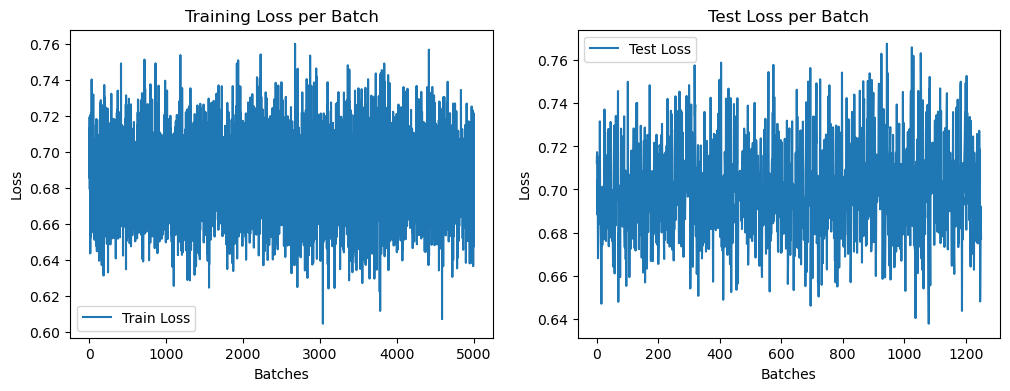

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# 主循环，收集每个批次的训练和测试损失
train_log = []  # 记录所有训练损失
test_log = []  # 记录所有测试损失

for epoch in range(1, 3):
    epoch_train_losses = train(model, device, train_loader, optimizer, epoch)
    train_log.extend(epoch_train_losses)  # 扩展训练日志列表
    epoch_test_losses = test(model, device, test_loader)
    test_log.extend(epoch_test_losses)  # 扩展测试日志列表

# 设置画布，要求同一行有两个图形
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# 绘制训练损失图
x_train = np.linspace(0, len(train_log), len(train_log))
ax[0].plot(x_train, train_log, label="Train Loss", linewidth=1.5)
ax[0].set_xlabel("Batches")
ax[0].set_ylabel("Loss")
ax[0].set_title("Training Loss per Batch")
ax[0].legend()


# 绘制测试损失图
x_test = np.linspace(0, len(test_log), len(test_log))
ax[1].plot(x_test, test_log, label="Test Loss", linewidth=1.5)
ax[1].set_xlabel("Batches")
ax[1].set_ylabel("Loss")
ax[1].set_title("Test Loss per Batch")
ax[1].legend()

plt.show()

#### 训练和测试GRU模型

In [8]:
# 设置设备并实例化模型，定义损失函数和优化器，开始训练和测试
device = torch.device("cuda" )
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = GRUModel(input_size, hidden_size=16, num_layers=2, output_size=output_size).to(device)
optimizer = optim.Adam(model.parameters())

for epoch in range(1, 11):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

Train Epoch: 1 [0/80000 (0%)]	Loss: 0.678068
Train Epoch: 1 [3200/80000 (4%)]	Loss: 0.690039
Train Epoch: 1 [6400/80000 (8%)]	Loss: 0.688821
Train Epoch: 1 [9600/80000 (12%)]	Loss: 0.694854
Train Epoch: 1 [12800/80000 (16%)]	Loss: 0.688980
Train Epoch: 1 [16000/80000 (20%)]	Loss: 0.696732
Train Epoch: 1 [19200/80000 (24%)]	Loss: 0.695688
Train Epoch: 1 [22400/80000 (28%)]	Loss: 0.694321
Train Epoch: 1 [25600/80000 (32%)]	Loss: 0.695409
Train Epoch: 1 [28800/80000 (36%)]	Loss: 0.692810
Train Epoch: 1 [32000/80000 (40%)]	Loss: 0.696133
Train Epoch: 1 [35200/80000 (44%)]	Loss: 0.697802
Train Epoch: 1 [38400/80000 (48%)]	Loss: 0.687442
Train Epoch: 1 [41600/80000 (52%)]	Loss: 0.689094
Train Epoch: 1 [44800/80000 (56%)]	Loss: 0.689205
Train Epoch: 1 [48000/80000 (60%)]	Loss: 0.694304
Train Epoch: 1 [51200/80000 (64%)]	Loss: 0.691769
Train Epoch: 1 [54400/80000 (68%)]	Loss: 0.702939
Train Epoch: 1 [57600/80000 (72%)]	Loss: 0.693061
Train Epoch: 1 [60800/80000 (76%)]	Loss: 0.690007
Train Epoc

## 4.3 堆叠循环神经网络 (Stacked RNN)
Stacked RNN（堆叠循环神经网络）是一种循环神经网络的变体，通过堆叠多个RNN层来增加网络的深度，从而提高模型的表达能力和学习复杂序列数据的能力。在堆叠RNN中，每一层RNN的输出成为下一层RNN的输入，这样可以帮助网络捕获更高层次的时间序列特征。

### Stacked RNN的工作原理：

1. **多层结构**：在堆叠RNN中，有多个RNN层按顺序堆叠。第一层RNN直接处理原始输入序列，而每个后续的RNN层处理前一层RNN的输出。

2. **信息流动**：在每个时间步，每一层RNN都会根据其当前的输入和前一个时间步的隐藏状态更新其隐藏状态，并将更新后的隐藏状态传递给下一层作为输入。这个过程在所有层中重复进行，直到达到最顶层的RNN。

3. **输出**：在堆叠RNN中，通常只有最顶层的RNN层产生最终输出，这些输出可以用于后续的处理或直接作为模型的最终预测。然而，也可以设计网络以利用所有层的输出，具体取决于特定的应用需求。

### Stacked RNN的优点：

- **增强的表达能力**：通过增加网络的深度，堆叠RNN能够学习更加复杂和抽象的特征表示，这对于处理复杂的序列任务特别有用。
- **更好的信息捕获能力**：每一层RNN可以学习不同层次的时间序列特征，底层可能专注于捕获短期依赖性，而高层则能够捕获更长期的依赖性。

### Stacked RNN的局限性：

- **计算成本**：增加网络深度会导致模型参数数量增加，从而增加训练和推理时的计算成本。
- **训练难度**：堆叠RNN可能更难训练，尤其是当网络非常深时，可能会遇到梯度消失或梯度爆炸的问题，尽管使用像LSTM或GRU这样的高级RNN单元可以在一定程度上缓解这些问题。

堆叠RNN可以用于各种序列处理任务，如自然语言处理（NLP）、语音识别、时间序列预测等。在实现堆叠RNN时，可以使用标准的RNN、LSTM或GRU单元，根据任务的具体需求选择合适的单元和堆叠层数。

### 代码实现
通过设定循环神经网络的`num_layers`参数，可以实现堆叠循环神经网络。在PyTorch中，可以使用`nn.RNN`、`nn.LSTM`或`nn.GRU`模块来实现堆叠RNN。

## 4.4 双向循环神经网络 (Bidirectional RNN)
双向RNN（Bi-directional Recurrent Neural Network，Bi-RNN）是一种特殊类型的循环神经网络，它在处理序列数据时同时考虑了过去（正向）和未来（反向）的上下文信息。这种网络结构通过在序列的两个方向上分别应用RNN，然后将这两个方向的输出合并，以获取更全面的序列特征表示。

### 工作原理：

1. **双向处理**：在双向RNN中，序列数据会被两个独立的RNN层处理。一个RNN层按正常顺序处理数据（从头到尾），称为正向RNN；另一个RNN层则按相反顺序处理数据（从尾到头），称为反向RNN。

2. **输出合并**：对于序列中的每个时间步，正向RNN和反向RNN的输出通常会被合并（例如，通过拼接或求和）以产生该时间步的最终输出。这允许每个时间步的输出同时包含之前和之后的上下文信息。

### 应用场景：

双向RNN特别适用于需要同时考虑输入序列的前后上下文的任务，例如：

- **自然语言处理（NLP）**：在诸如文本分类、情感分析、命名实体识别等任务中，双向RNN能够同时考虑单词的前文和后文上下文。
- **语音识别**：在语音信号的转录中，了解一个音节的前后音节可以提高识别的准确性。
- **时间序列分析**：在某些情况下，了解一个事件的前后事件可以帮助更好地预测当前事件的发生。

### 双向LSTM和GRU：

由于标准RNN容易受到梯度消失和梯度爆炸问题的影响，双向RNN通常会使用更先进的RNN变体，如LSTM（Long Short-Term Memory）或GRU（Gated Recurrent Unit），以增强模型处理长期依赖的能力。这些变体通过在每个方向上使用双向LSTM或双向GRU单元来实现双向RNN的概念。

### 实现：

在PyTorch中，可以通过设置`nn.LSTM`或`nn.GRU`模块的`bidirectional=True`参数来创建双向版本。这会导致每个时间步产生两个隐藏状态（正向和反向），它们可以被合并用于后续的处理或作为最终输出。

### 注意事项：

虽然双向RNN能够提供更丰富的上下文信息，但它们也有一些局限性和注意事项：

- **计算成本**：由于双向RNN实际上是在两个方向上各运行一个RNN，因此它们的计算成本几乎是单向RNN的两倍。
- **实时应用限制**：对于需要实时或在线处理的应用（如实时语音识别），双向RNN可能不适合，因为反向RNN需要等到整个序列都被观察到才能开始处理。

## 4.6 Graph Neural Networks (GNN)
图神经网络（Graph Neural Networks，GNNs）是一种专门用于处理图结构数据的神经网络。图结构数据是由节点（vertices）和边（edges）组成的，能够表示实体及其之间的关系，这种数据结构在多个领域中非常常见，如社交网络、知识图谱、分子化学结构、交通网络等。

### GNN的基本概念：

GNN的核心思想是通过节点的特征和其邻居节点的信息来更新节点状态，从而学习节点的表示（embedding）。这个过程通常涉及以下几个步骤：

1. **信息聚合（Aggregation）**：每个节点会收集其邻居节点的信息。这个聚合步骤可以是简单的求和、平均或者更复杂的操作，如加权求和。

2. **信息更新（Update）**：节点将聚合来的信息与自身的特征结合起来，通过一个更新函数（如神经网络层）来更新自己的状态。

3. **信息传播（Propagation）**：以上两个步骤会在图中的节点之间重复进行，通过多次迭代允许信息在图中传播，从而使每个节点能够捕获到更广泛的邻域信息。

### GNN的变体：

GNN有多个变体，主要包括：

- **图卷积网络（Graph Convolutional Networks，GCNs）**：借鉴了卷积神经网络（CNNs）的概念，通过定义图上的卷积操作来聚合邻居节点的信息。

- **图注意力网络（Graph Attention Networks，GATs）**：引入了注意力机制来动态地确定邻居节点的重要性，使得模型可以更加灵活地聚合邻居信息。

- **图自编码器（Graph Autoencoders，GAEs）**：用于图数据的无监督学习，通过编码器将节点编码为低维向量，然后通过解码器重构图结构。

- **图生成网络（Graph Generative Networks）**：用于生成图结构数据，如分子生成。

### 应用领域：

GNN在多个领域都有广泛的应用，包括但不限于：

- **推荐系统**：在社交网络或电商平台中，利用用户和商品的关系图来提高推荐的准确性。

- **化学和生物信息学**：在分子结构识别、蛋白质结构预测等任务中，通过分子图来预测化学性质或生物活性。

- **交通网络**：利用道路或航线构成的图来预测交通流量或优化路线规划。

- **知识图谱**：在知识图谱中，利用GNN来提高实体识别、关系抽取或问答系统的性能。

### 挑战和未来方向：

虽然GNN已经取得了显著的进展，但仍面临一些挑战，如如何高效处理大规模图数据、如何捕获图结构的动态变化、以及如何提高GNN的解释性等。未来的研究可能会围绕这些挑战展开，并探索更多创新的GNN架构和应用场景。